In [8]:
from tensorflow import keras
import tensorflow as tf

In [2]:
# Importar os datasets 

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)
print(X_train_full.dtype) # Scikit-Learn would've given us a collection of floats
(60000, 28, 28)


(60000, 28, 28)
uint8


(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]
'Coat'

'Coat'

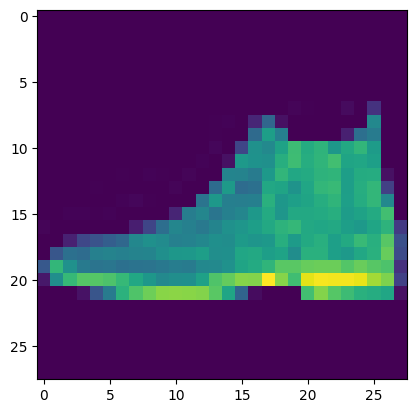

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
img = X_test[0]
plt.imshow(img)

# Modelo MLP (Multi Layer Perceptron)

In [107]:
# INPUT LAYER = shape de 28x28 para transformar em um vetor de 1 dimesão
# HIDDEN LAYER 1 = hidden layers com 300 neuronios, com função de ativação RELU
# HIDDEN LAYER 2 = hidden layers com 100 neuronios, com função de ativação RELU
# OUT LAYER = função de ativação SOFTMAX

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer="glorot_uniform", kernel_regularizer='l2',activation='relu'),
    keras.layers.Dense(100, kernel_initializer="glorot_uniform",kernel_regularizer='l2', activation='relu'),
    keras.layers.BatchNormalization(synchronized=True),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer='l2'),
])

ModuleNotFoundError: No module named 'keras_tuner'

In [91]:
# Informações sobre o Modelo Criado
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 300)               235500    
                                                                 
 dense_37 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_8 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 10)                1010      
                                                                 
Total params: 267010 (1.02 MB)
Trainable params: 266810 (1.02 MB)
Non-trainable params: 200 (800.00 Byte)
_____________

In [92]:
# As camadas dos modelo
model.layers

In [93]:
hidden1 = model.layers[1]
hidden1.name
layer1 = model.get_layer(hidden1.name)
weights,biases = hidden1.get_weights()

In [94]:
# Primeira HIDENN LAYER
layer1

In [95]:
# Pesos da Primeira HIDDEN LAYER 
weights

array([[ 0.07275046, -0.06976359, -0.07051472, ...,  0.01400813,
        -0.0560419 , -0.01831643],
       [ 0.06043662,  0.03716347, -0.00201324, ...,  0.06290057,
         0.00315191,  0.05380239],
       [-0.05741216, -0.06888752, -0.07338473, ...,  0.01151398,
         0.02658447,  0.03582741],
       ...,
       [-0.0186612 ,  0.06107765,  0.0020455 , ...,  0.02702907,
        -0.01048708,  0.07162686],
       [ 0.00888444, -0.03348864, -0.06730311, ...,  0.06495389,
         0.00779095,  0.07278402],
       [ 0.03900689, -0.01871113,  0.03826375, ..., -0.0424734 ,
        -0.02169955,  0.03695346]], dtype=float32)

In [96]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [97]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 4.7745 - accuracy: 0.8171 - val_loss: 3.4074 - val_accuracy: 0.8398
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.5674 - accuracy: 0.8535 - val_loss: 1.9173 - val_accuracy: 0.8578
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 1.5024 - accuracy: 0.8605 - val_loss: 1.2591 - val_accuracy: 0.8290
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.9686 - accuracy: 0.8666 - val_loss: 0.9264 - val_accuracy: 0.8464
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7029 - accuracy: 0.8691 - val_loss: 0.7233 - val_accuracy: 0.8310
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5695 - accuracy: 0.8702 - val_loss: 0.5790 - val_accuracy: 0.8586
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5013 - accuracy: 0.8727 - val_loss: 0.5105 - val_accuracy:

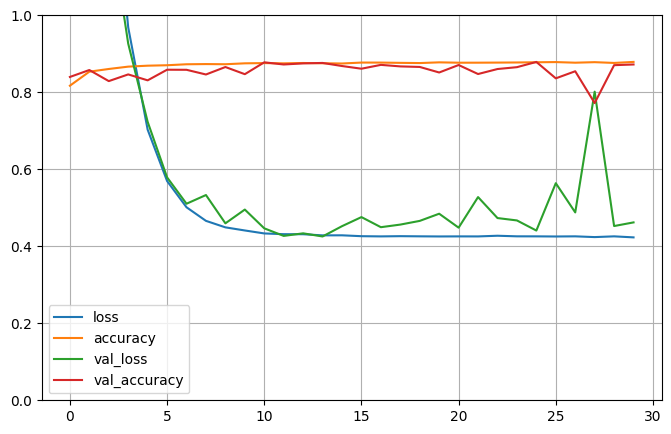

In [98]:
import pandas as pd
import numpy as np
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

In [99]:
X_new = X_test[:5]
y_preds = model.predict(X_new)
y_preds.round(2)

1/1 [==============================] - 0s 176ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [100]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
#y_pred = model.predict_classes(X_new) removed this line because 

1/1 [==============================] - 0s 56ms/step


In [101]:
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [ ]:
# FAZER K-FOLD

In [102]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [103]:
class_names
['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

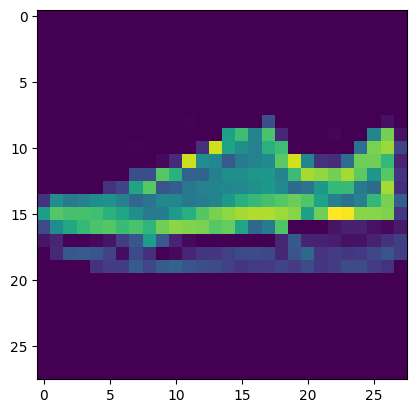

In [104]:
img1 = X_test[9]
plt.imshow(img1)

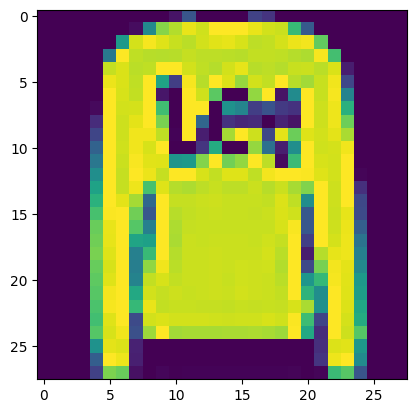

In [105]:
img2 = X_test[1]
plt.imshow(img2)

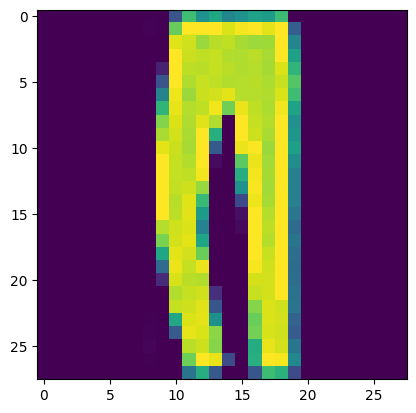

In [106]:
img3 = X_test[2]
plt.imshow(img3)